In [202]:
trace_file = "./trace_c8_v0"

In [203]:
with open(trace_file) as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content] 

print len(content)
num_header_lines = 4
content = content[num_header_lines:]

def allocation(v):
    return (v[0] == 'a')

def free(v):
    return (v[0] == 'f')

allocations_dict = dict()
allocations_indices = dict()
freed_dict = dict()
freed_order = []
alloc_order = []
for i in range(2883+1):
    alloc_order.append(0)
    
for i, v in enumerate(content):
    v = v.split(" ")
    if allocation(v):
        allocations_indices[v[1]] = v[2]
        alloc_order[int(v[1])] = int(v[2])
        if v[2] not in allocations_dict:
            allocations_dict[v[2]] = 1
        else:
            allocations_dict[v[2]] += 1
    elif free(v):
        if v[1] not in freed_dict:
            freed_dict[v[1]] = 'freed'
            freed_order.append(int(v[1]))

    

8406


In [204]:
print allocations_dict

{'12807': 1, '3824': 1, '2473': 1, '26868': 1, '25268': 1, '25177': 1, '21361': 1, '15342': 1, '20916': 1, '64': 702, '23596': 1, '6087': 1, '5014': 1, '10516': 1, '16372': 1, '10696': 1, '25097': 1, '22625': 1, '26219': 1, '14194': 1, '18752': 1, '27181': 1, '12154': 1, '8': 697, '5965': 1, '19153': 1, '7422': 1, '24809': 1, '4270': 1, '991': 1, '29878': 1, '8046': 1, '10408': 1, '15482': 1, '15480': 1, '2854': 1, '15469': 1, '29360': 1, '27770': 1, '128': 706, '4604': 1, '8956': 1, '5891': 1, '13311': 1, '23805': 1, '10949': 1, '13112': 1, '7403': 1, '15599': 1, '10237': 1, '17309': 1, '32396': 1, '7547': 1}


In [205]:
# convert each key to ints, so can sort
# for some reason can't start out with ints, and increment the values.  this works.

for key in allocations_dict:
    val = allocations_dict[key]
    del allocations_dict[key]
    allocations_dict[int(key)] = val

freed_dict_ints = dict()
for key in freed_dict:
    val = freed_dict[key]
    freed_dict_ints[int(key)] = val
    

In [206]:
prev_val = -1
for i in sorted(freed_dict_ints):
    if (prev_val == -1):
        prev_val = i
        continue
    if (prev_val != i - 1):
        print "FOUND A MISSING ONE", prev_val  
    prev_val = i

In [207]:
allocation_amounts = []
allocation_counts = []
allocation_totals = []

for key in sorted(allocations_dict.iterkeys()):
    allocation_amounts.append(key)
    allocation_counts.append(allocations_dict[key])
    allocation_totals.append(int(allocations_dict[key]*key))
    

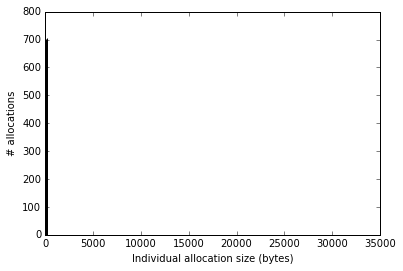

In [208]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = len(allocation_amounts)

ind = np.arange(N)  # the x locations for the groups
width = 1.0       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(allocation_amounts, allocation_counts, width, color='r')
plt.xlabel('Individual allocation size (bytes)')
plt.ylabel('# allocations')
plt.show()

# num times allocated vs. allocation amount

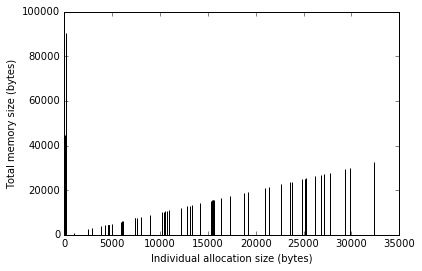

In [209]:
ind = np.arange(N)  # the x locations for the groups
width = 1.0       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(allocation_amounts, allocation_totals, width, color='r')
plt.xlabel('Individual allocation size (bytes)')
plt.ylabel('Total memory size (bytes)')
plt.show()

# memory size vs. allocation amount

In [210]:
# copy over dict
left_at_end_allocations_dict = dict()
for key in allocations_dict:
    val = allocations_dict[key]
    left_at_end_allocations_dict[str(key)] = allocations_dict[key]

print left_at_end_allocations_dict
    
# subtract
for key in freed_dict_ints:
    if str(key) in allocations_indices:
        amount = allocations_indices[str(key)]
        left_at_end_allocations_dict[str(amount)] -= 1
        if left_at_end_allocations_dict[amount] == 0:
            del left_at_end_allocations_dict[amount]
        
print left_at_end_allocations_dict

{'20916': 1, '22625': 1, '26868': 1, '25268': 1, '29360': 1, '25177': 1, '128': 706, '15342': 1, '3824': 1, '64': 702, '23596': 1, '6087': 1, '5014': 1, '10516': 1, '27181': 1, '10696': 1, '25097': 1, '26219': 1, '14194': 1, '18752': 1, '16372': 1, '12154': 1, '8': 697, '5965': 1, '19153': 1, '7422': 1, '24809': 1, '4270': 1, '991': 1, '29878': 1, '8046': 1, '10408': 1, '15482': 1, '15480': 1, '2854': 1, '15469': 1, '5891': 1, '27770': 1, '21361': 1, '4604': 1, '8956': 1, '12807': 1, '13311': 1, '23805': 1, '10949': 1, '13112': 1, '2473': 1, '7403': 1, '15599': 1, '10237': 1, '17309': 1, '32396': 1, '7547': 1}
{}


In [211]:
print sum(allocation_counts)
print sum(allocation_totals)
print sum(allocation_counts)*32
print "hdr overhead is", sum(allocation_counts)*32.0/sum(allocation_totals)


2155
901887
68960
hdr overhead is 0.0764619070904


In [212]:
## Free order
print freed_order

[26, 35, 78, 93, 76, 207, 149, 294, 331, 315, 394, 375, 358, 492, 378, 368, 478, 576, 454, 647, 468, 687, 762, 726, 709, 752, 1055, 1011, 701, 1096, 1103, 856, 1006, 1106, 975, 1327, 681, 1238, 1176, 1367, 1013, 885, 1431, 1223, 1342, 1393, 865, 1488, 1520, 1349, 1646, 1698, 1656, 1713, 1730, 1870, 1945, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 79, 80, 2064, 81, 82, 83, 1928, 84, 85, 86, 87, 88, 89, 90, 91, 92, 1948, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 1

In [213]:
## Alloc order
print alloc_order

[8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 128, 8, 64, 128, 8, 64, 128, 8, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 64, 128, 17309, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 13311, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64

In [214]:
## Freed order by amount
print len(alloc_order)
print max(freed_order)
freed_order_by_amount = []
for i,v in enumerate(freed_order):
    amount = alloc_order[int(freed_order[i])]
    freed_order_by_amount.append(amount)

2884
2154


In [215]:
print freed_order_by_amount

[128, 8, 17309, 13311, 64, 128, 8, 5891, 15599, 5965, 29878, 64, 128, 128, 64, 128, 64, 29360, 64, 64, 128, 8, 32396, 19153, 128, 64, 128, 7547, 128, 15482, 991, 4270, 10949, 8, 3824, 2473, 23596, 5014, 128, 64, 64, 128, 8, 8, 128, 10696, 14194, 6087, 16372, 15342, 64, 8, 128, 10516, 27770, 8, 8, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 128, 8, 64, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64, 128, 8, 64

In [216]:
print sum(alloc_order[-30:])

0


In [217]:
count = 0
for i in freed_order_by_amount:
    if (i == 64):
        count += 1
        
print count

702


In [218]:
print sum(allocation_totals[0:3])
print sum(allocation_totals[3:])

ratio =  sum(allocation_totals[3:])/(sum(allocation_totals[0:3])*1.0+ sum(allocation_totals[3:]))

print ratio*100.0, "percent of memory is in large allocations"


140872
761015
84.3803048497 percent of memory is in large allocations


[17309, 13311, 5891, 5965, 15599, 29878, 29360, 23596, 19153, 32396, 4270, 14194, 3824, 10949, 7547, 15482, 991, 5014, 2473, 15342, 10696, 6087, 16372, 10516, 27770, 12807, 2854, 10408, 21361, 10237, 25097, 20916, 13112, 8956, 25177, 26219, 8046, 7403, 7422, 15469, 4604, 12154, 23805, 18752, 27181, 26868, 22625, 24809, 15480, 25268]
[17309, 13311, 5891, 15599, 5965, 29878, 29360, 32396, 19153, 7547, 15482, 991, 4270, 10949, 3824, 2473, 23596, 5014, 10696, 14194, 6087, 16372, 15342, 10516, 27770, 10237, 21361, 13112, 25097, 10408, 25177, 26219, 8956, 2854, 7403, 20916, 8046, 23805, 12154, 15469, 12807, 18752, 27181, 7422, 4604, 22625, 15480, 24809, 26868, 25268]


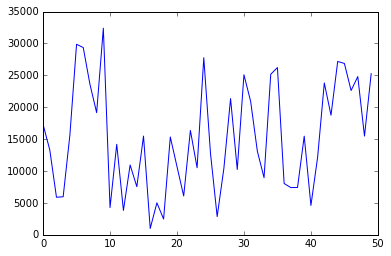

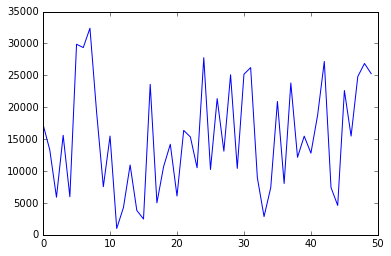

50
991


In [219]:
alloc_order_large_only = []
for i in alloc_order:
    if i > 512:
        alloc_order_large_only.append(i)
        
freed_order_by_amount_large_only = []
for i in freed_order_by_amount:
    if i > 512:
        freed_order_by_amount_large_only.append(i)
        
print alloc_order_large_only
print freed_order_by_amount_large_only

plt.plot(alloc_order_large_only)
plt.show()
plt.plot(freed_order_by_amount_large_only)
plt.show()
print len(alloc_order_large_only)
print min(alloc_order_large_only)

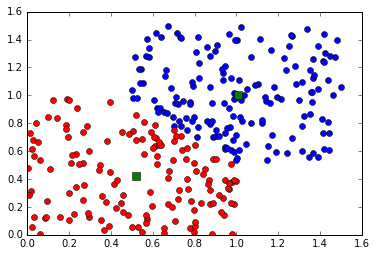

In [220]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq

# data generation
data = vstack((rand(150,2) + array([.5,.5]),rand(150,2)))

# computing K-Means with K = 2 (2 clusters)
centroids,_ = kmeans(data,2)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'or')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

[ 19498.2          2535.5         10826.66666667   5305.16666667   7874.8
  29851.          25064.5         14716.8       ]


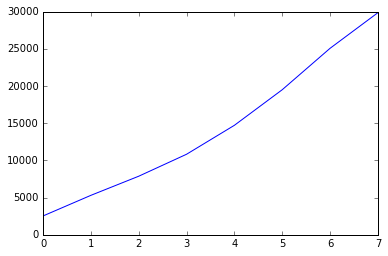

In [221]:
alloc_order_large_only_doubles = []
for i in alloc_order_large_only:
    alloc_order_large_only_doubles.append(float(i))
clusters,_ = kmeans(sorted(alloc_order_large_only_doubles),8)
print clusters
plt.plot(sorted(clusters))

In [222]:
# clusters = np.append(clusters,0)
# clusters = np.append(clusters,max(alloc_order_large_only_doubles))
# for i in sorted(clusters):
#     print i

clusters = sorted(clusters)
medians = []
for i in range(len(clusters)-1):
    median = (clusters[i] + clusters[i+1])/2.0
    medians.append(median)

medians.append(max(alloc_order_large_only_doubles))

print 
print medians




[3920.3333333333335, 6589.9833333333336, 9350.7333333333336, 12771.733333333334, 17107.5, 22281.349999999999, 27457.75, 32396.0]


In [223]:
copy = []
for i in sorted(alloc_order_large_only_doubles):
    copy.append(i)
    
print copy

medians_count = np.zeros(len(medians))
print medians_count
#find lowest bucket
for i in copy:
    for index,j in enumerate(medians):
        if i < j:
            medians_count[index] += 1
            break

print medians_count
print medians


[991.0, 2473.0, 2854.0, 3824.0, 4270.0, 4604.0, 5014.0, 5891.0, 5965.0, 6087.0, 7403.0, 7422.0, 7547.0, 8046.0, 8956.0, 10237.0, 10408.0, 10516.0, 10696.0, 10949.0, 12154.0, 12807.0, 13112.0, 13311.0, 14194.0, 15342.0, 15469.0, 15480.0, 15482.0, 15599.0, 16372.0, 17309.0, 18752.0, 19153.0, 20916.0, 21361.0, 22625.0, 23596.0, 23805.0, 24809.0, 25097.0, 25177.0, 25268.0, 26219.0, 26868.0, 27181.0, 27770.0, 29360.0, 29878.0, 32396.0]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[  4.   6.   5.   6.  10.   5.  10.   3.]
[3920.3333333333335, 6589.9833333333336, 9350.7333333333336, 12771.733333333334, 17107.5, 22281.349999999999, 27457.75, 32396.0]
